In [1]:
%matplotlib inline
%load_ext autoreload      
%autoreload 2     

import sys
import copy
import numpy as np
from numpy import sqrt, pi, exp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sys.path.append("../")
from qo_simulator_1ph import QOsimulator_1ph as QOsimulator
sys.path.append("../lib/")
from _qo_simulator import _QOsimulator
path_to_qo_object = "../qo_object/"
sys.path.append(path_to_qo_object)
from qo_object import QOobject, Mirror, BeamSplitter, PolarizationRotator, PhaseShifter
path_to_qo_beam = "../qo_beam/"
sys.path.append(path_to_qo_beam)
from qo_beam import QObeam

In [2]:
## set parameters
N       = (256, 256)   # number of grid in the x and y directions
L       = (10*pi, 10*pi) # Size of space in the x and y dicrections
##
x0      = 0.5*L[0]-14.0 # initial position x
y0      = 0.5*L[1]-8.0  # initial position y
kx0     = 10.0   # center of initial k-space distribution (k_x axis)
ky0     = 0.0   # center of initial k-space distribution (k_y axis)
sigma_x = 2.0
sigma_y = 2.0
normalization = False
##
dt      = 0.04  # timestep
t_max   = 48
n_divide= 5

In [3]:
beam = QObeam(N, L, x0, y0, kx0, ky0, sigma_x, sigma_y)

# Create QOobject

----> optimizing omega_j for Beamsplitter...
----> Result: omega_j=0.307831, diff_prob=0.000000



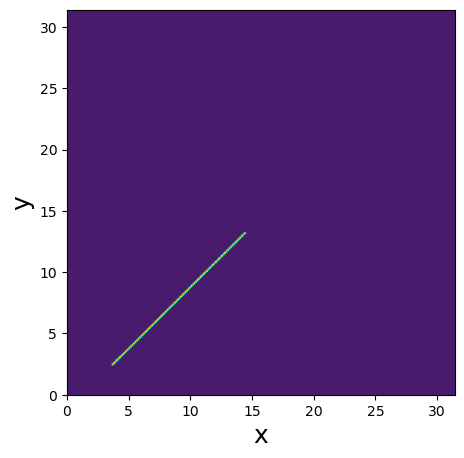

In [4]:
BS1 = BeamSplitter(N, L, 64 +10, 54 +10, size=1, angle=45, beam=beam, Lexp=5*pi)
BS1.show()

----> optimizing omega_j for Beamsplitter...
----> Result: omega_j=0.307831, diff_prob=0.000000



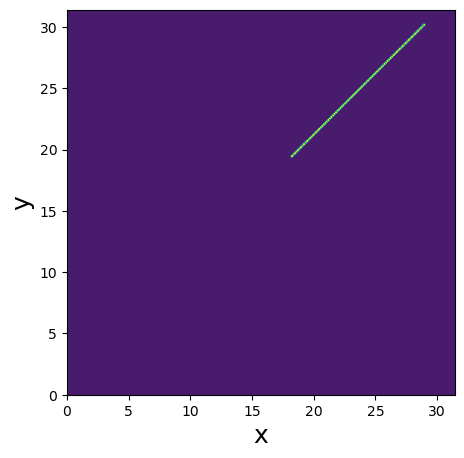

In [5]:
BS2 = BeamSplitter(N, L, 192, 202, size=1, angle=45, beam=beam, Lexp=5*pi)
BS2.show()

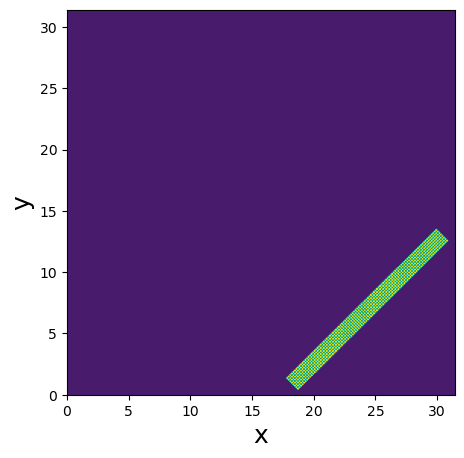

In [6]:
M1 = Mirror(N, L, 199, 57, size=1, angle=45, beam=beam)
M1.show()

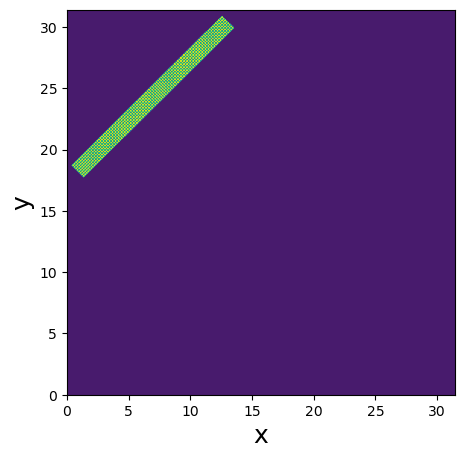

In [7]:
M2 = Mirror(N, L, 58, 198, size=1, angle=45, beam=beam)
M2.show()

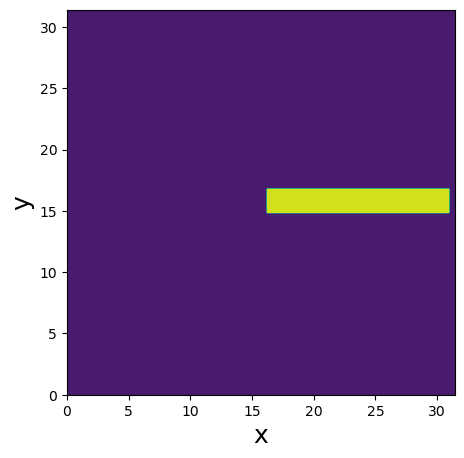

In [8]:
Dj=M1.Dj
omj=0.2*M1.omega_j
layer=16
PS = QOobject(int(960*layer/8), int(layer), Dj, omj, N, L, center_nx=int(N[0]/4*3), center_ny=int(N[1]/2), angle=0)
PS.show()

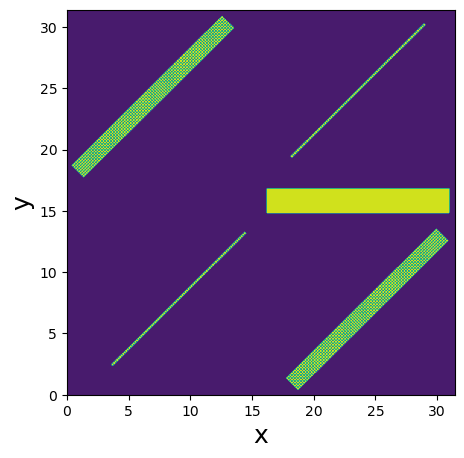

In [9]:
QOobject.show_all([BS1,BS2,M1,M2,PS])

# Mainroutine

In [10]:
interval_of_cf = np.linspace(0,0.0008,11)

def gen_show_tlist(t_max, n_divide):
    tlist = []
    for i in range(int(t_max/dt)+1):
        t = i*dt
        tlist.append(t)
    res = [ elem[0] for elem in np.array_split(tlist, n_divide)]
    res.append(tlist[-1])
    return  res

def show_info(qosim, cr, ck, cj, flag, t):
    if flag == "r":
        ck = qosim.to_kbases(cr)
    elif flag == "k":
        cr = qosim.to_rbases(ck)
    ## Check sum of probability
    print("t=", t)
    sum_norm_ck2 = np.sum(np.abs(ck.flatten())**2)
    sum_norm_cr2 = np.sum(np.abs(cr.flatten())**2)
    sum_norm_cj2 = np.sum(np.abs(cj.flatten())**2)
#         print("sum |ck|^2 = ", sum_norm_ck2)
    print("sum |cr|^2 = ", sum_norm_cr2)
    print("sum |cj|^2 = ", sum_norm_cj2)
    print("sum |cr|^2 + |cj|^2 = ", sum_norm_cr2 + sum_norm_cj2)
    # Energy
    if flag == "r":
        ck = qosim.to_kbases(cr)
    elif flag == "k":
        cr = qosim.to_rbases(ck)
    eF=qosim.calc_EF(ck)
    eA=qosim.calc_EA(cj)
    eI=qosim.calc_EI(cr, cj)
    econst=qosim.calc_Econst()
    print("E_F,  E_a, E_I, econst =", eF, eA,  eI, econst)
    print("Total energy = ", eF + eA +  eI + econst)
    print("Total energy - econst = ", eF + eA +  eI)
    ## Check sum of photon number density
    density = np.abs(cr)**2
    mat = np.zeros((qosim.N[0], qosim.N[1]))
    for _obj in [BS1, BS2, M1, M2, PS]:
        for idx in _obj.atom_pos_indices:
            mat[idx[0],idx[1]] = 1
    im, title = qosim.show(density, t, levels=interval_of_cf, extend="both")
    plt.contour(qosim.x, qosim.y, mat.T, colors="gray")            
    # plt.title("t=%.2f" % t, fontsize=18)
    # plt.savefig("fig/MZ_interaction_picture_"+str(int(t))+".eps", bbox_inches="tight")
    plt.show()
    return im, title

show_tlist = gen_show_tlist(t_max, n_divide=n_divide)

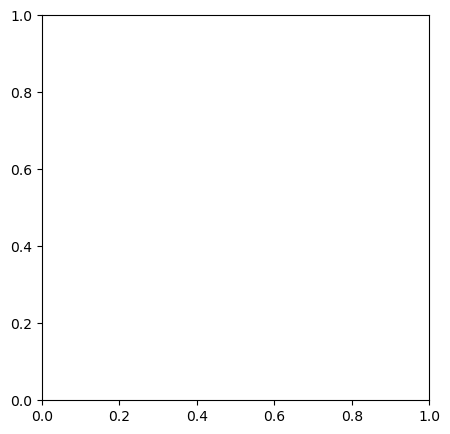

In [11]:
objects=[BS1,BS2,M1,M2,PS]
qosim = _QOsimulator(N, L, dt, beam=beam, objects=objects)
ck_t0 = qosim.calc_ck_t0()
cr_t0 = qosim.to_rbases(ck_t0)
cj_t0 = qosim.calc_cj_t0()

t= 0.0
sum |cr|^2 =  1.0000000000000004
sum |cj|^2 =  0.0
sum |cr|^2 + |cj|^2 =  1.0000000000000004
E_F,  E_a, E_I, econst = 10.006251956801506 0.0 0.0 -9894.178250405434
Total energy =  -9884.171998448632
Total energy - econst =  10.006251956801506


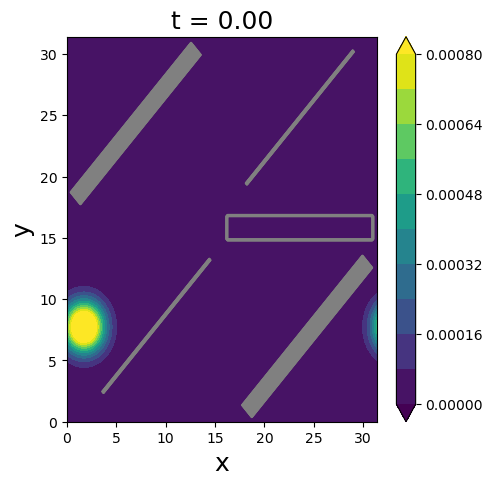

t= 9.64
sum |cr|^2 =  1.040848419533186
sum |cj|^2 =  0.007233359579568724
sum |cr|^2 + |cj|^2 =  1.0480817791127548
E_F,  E_a, E_I, econst = 10.375731849356258 0.009166461035649314 0.07701464312351569 -9894.178250405434
Total energy =  -9883.716337451919
Total energy - econst =  10.461912953515423


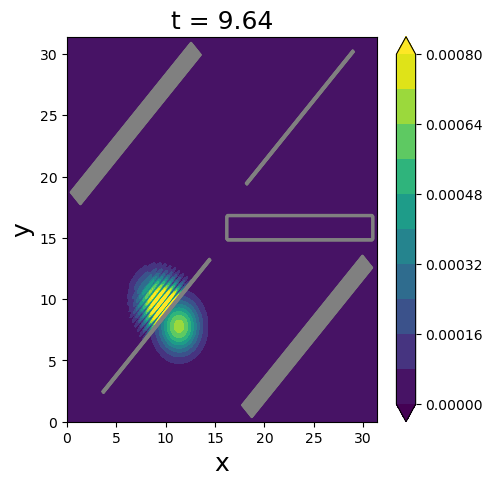

t= 19.240000000000002
sum |cr|^2 =  1.09794415147282
sum |cj|^2 =  0.17236468464092497
sum |cr|^2 + |cj|^2 =  1.2703088361137451
E_F,  E_a, E_I, econst = 11.142057551704662 0.2317978966152977 -1.378662300558146 -9894.178250405434
Total energy =  -9884.183057257671
Total energy - econst =  9.995193147761814


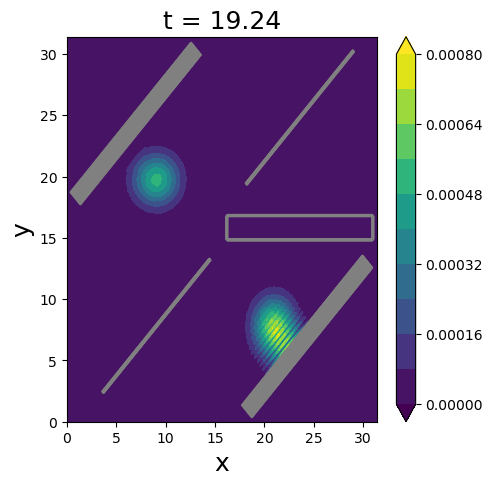

t= 28.84
sum |cr|^2 =  6.570951629070465
sum |cj|^2 =  20.370212562201566
sum |cr|^2 + |cj|^2 =  26.94116419127203
E_F,  E_a, E_I, econst = 84.25905050438571 13.991654323315144 -165.25350083817096 -9894.178250405434
Total energy =  -9961.181046415904
Total energy - econst =  -67.0027960104701


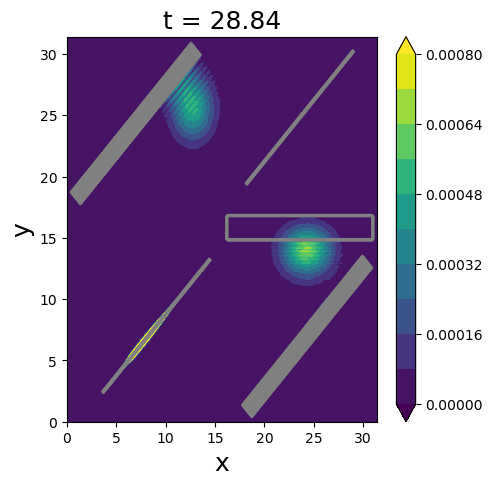

t= 38.44
sum |cr|^2 =  685.1431401151438
sum |cj|^2 =  2569.549315907603
sum |cr|^2 + |cj|^2 =  3254.692456022747
E_F,  E_a, E_I, econst = 9213.765344226342 1607.4249780498285 -20877.255254854812 -9894.178250405434
Total energy =  -19950.243182984075
Total energy - econst =  -10056.064932578642


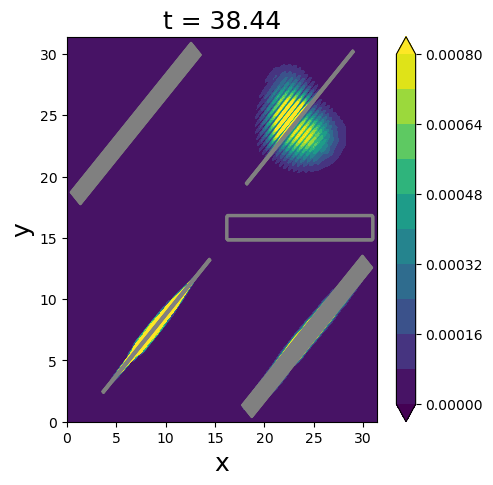

t= 48.0
sum |cr|^2 =  84947.70708252887
sum |cj|^2 =  319852.51783301483
sum |cr|^2 + |cj|^2 =  404800.2249155437
E_F,  E_a, E_I, econst = 1143887.7954685837 197396.14502337677 -2597541.209708231 -9894.178250405434
Total energy =  -1266151.4474666761
Total energy - econst =  -1256257.2692162707


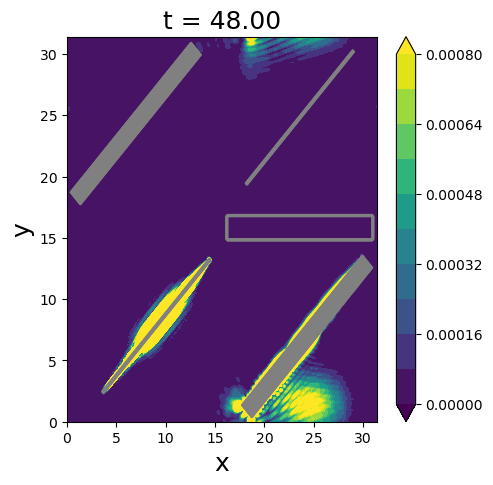

CPU times: user 1min 1s, sys: 2.72 s, total: 1min 3s
Wall time: 1min 3s


In [12]:
%%time
for i in range(int(t_max/dt)+1):
    t = i*dt
    if i == 0:
        ck = copy.deepcopy(ck_t0)
        cr = copy.deepcopy(cr_t0)
        cj = copy.deepcopy(cj_t0)
        flag = "k"
    else:
        ck, cj, flag = qosim.runge_kutta_step_interaction_picture(ck, cj, t, degree=4, normalization=normalization)        
    if t in show_tlist:
        show_info(qosim, cr, ck, cj, flag, t)

# Phase shift dependence

In [13]:
def mat_above(N,h,w):
    mat = np.zeros(N)
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j>i+10:
                mat[i,j] = 1.0
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j<N[1]/2-w:
                mat[i,j] = 1.0
    return mat

def mat_right(N,h,w):
    mat = np.zeros(N)
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]/2-h and j>N[1]/2-w and j<i+10:
                mat[i,j] = 1.0
    for i in range(N[0]):
        for j in range(N[1]):
            if i<N[0]/2-h and j>N[1]/2-w:
                mat[i,j] = 1.0
    return mat

CPU times: user 9min 20s, sys: 24.8 s, total: 9min 45s
Wall time: 9min 45s


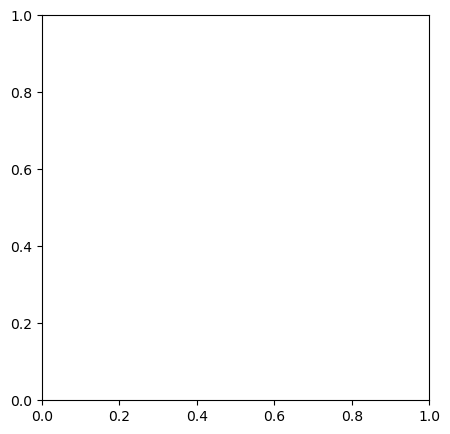

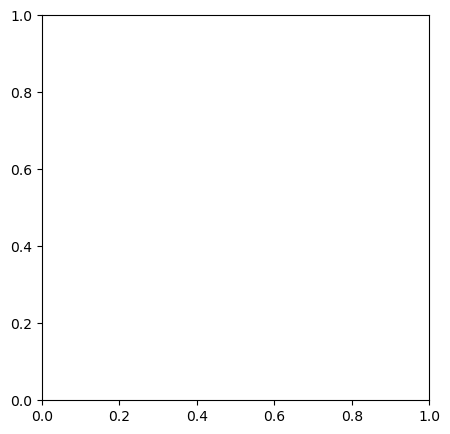

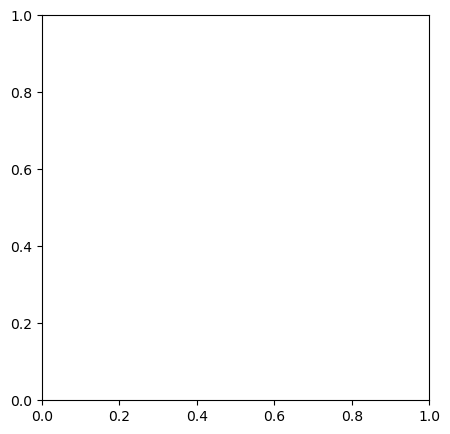

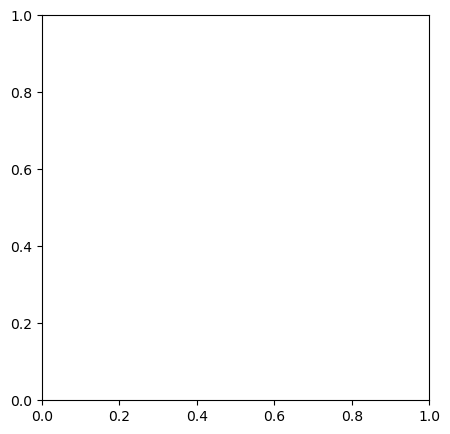

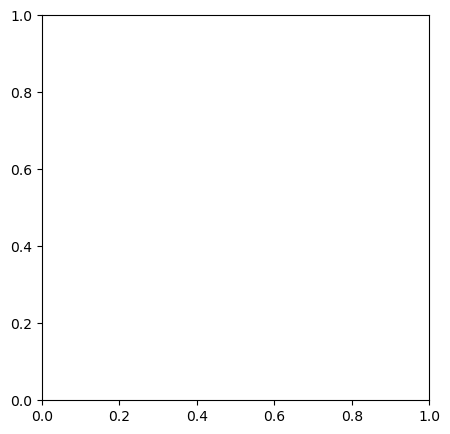

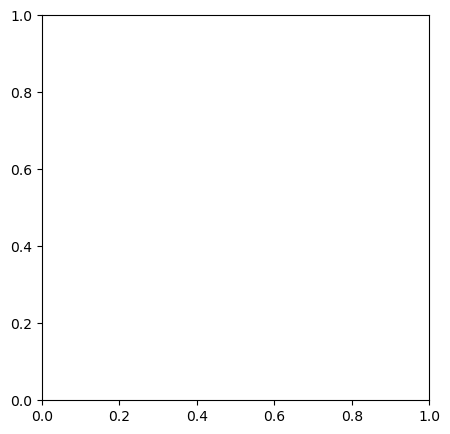

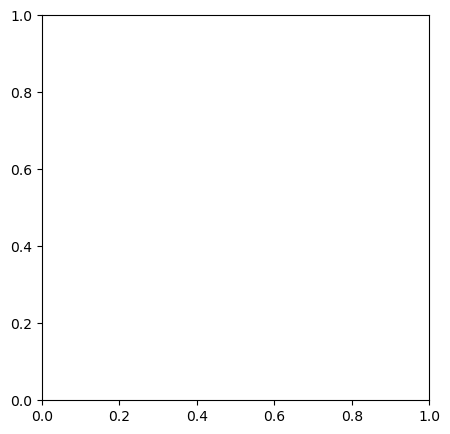

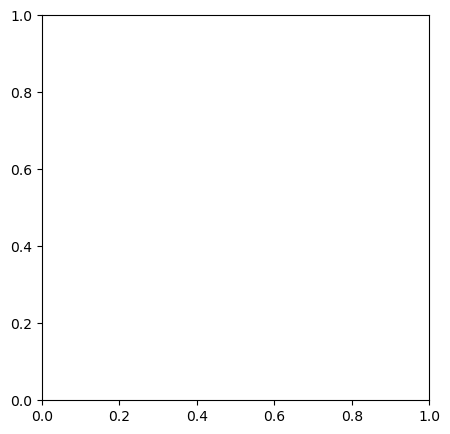

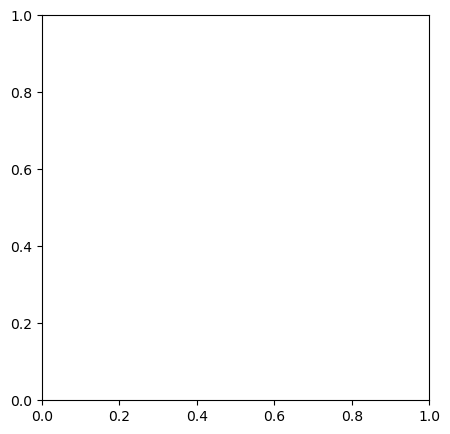

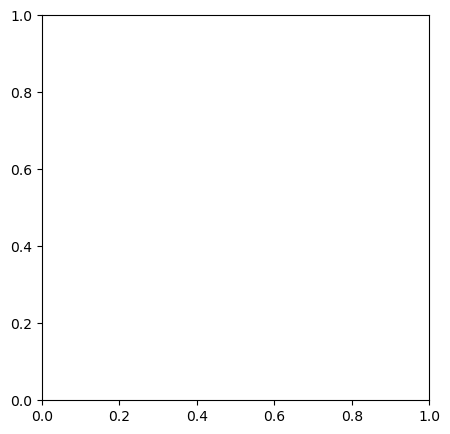

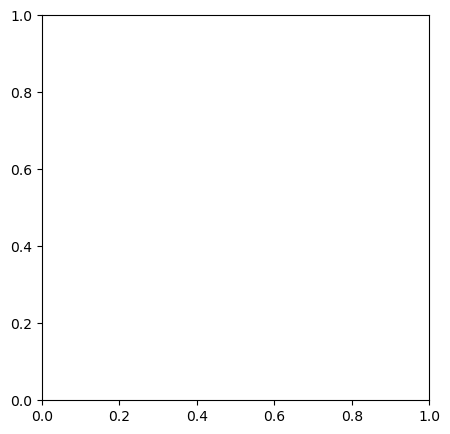

In [14]:
%%time
layers=np.arange(0,20+1,2)
p_right=[]
for layer in layers:
    Dj=M1.Dj
    omj=0.2*M1.omega_j
    if layer==0:
        objects=[BS1, BS2, M1, M2]
    else:
        PS = QOobject(int(960*layer/8), int(layer), Dj, omj, N, L, center_nx=int(N[0]/4*3), center_ny=int(N[1]/2), angle=0)
        objects=[BS1, BS2, M1, M2, PS]
    ## initialization
    qosim = _QOsimulator(N, L, dt, beam=beam, objects=objects)
    ck_t0 = qosim.calc_ck_t0()
    cr_t0 = qosim.to_rbases(ck_t0)
    cj_t0 = qosim.calc_cj_t0()
    ## time evolution
    for i in range(int(t_max/dt)+1):
        t = i*dt
        if i == 0:
            ck = copy.deepcopy(ck_t0)
            cr = copy.deepcopy(cr_t0)
            cj = copy.deepcopy(cj_t0)
            flag = "k"
        else:
            ck, cj, flag = qosim.runge_kutta_step_interaction_picture(ck, cj, t, degree=4, normalization=normalization)        
    ## evaluation
    cr = qosim.to_rbases(ck)
    density = np.abs(cr)**2
    mat = mat_right(N,0,0)
    masked_density = mat*density
    p_right.append(np.sum(masked_density))

In [16]:
from scipy import interpolate

In [17]:
fit_right = interpolate.interp1d(layers, p_right, kind="cubic")

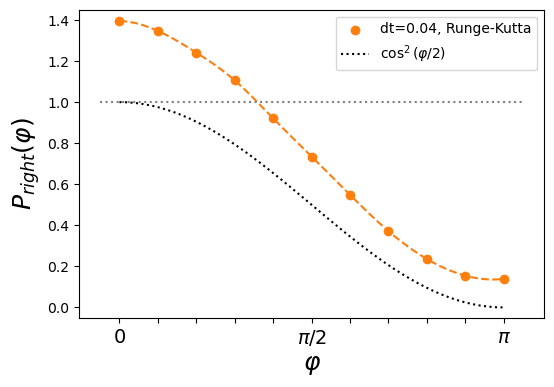

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(layers, p_right, label="dt=0.04, Runge-Kutta",color="tab:orange")
##
x=np.linspace(0,20)
plt.plot(x,np.cos(x/20*pi/2)**2, color="k", ls=":", label=r"$\cos^2(\varphi/2)$")
plt.plot(x,fit_right(x),ls="--",color="tab:orange")
##
plt.hlines(1.0, -1, 21, color="gray", ls=":")
plt.ylim(-0.05,1.45)
plt.xlabel(r"$\varphi$", fontsize=18)
plt.ylabel(r"$P_{right}(\varphi)$", fontsize=18)
plt.xticks(layers, [r"$0$","","","","",r"$\pi/2$","","","","",r"$\pi$"], fontsize=14)
plt.legend(loc="upper right")
# plt.savefig("fig/MZ_phase_shift_runge-kutta.eps", bbox_inches="tight")